<a href="https://colab.research.google.com/github/harsh194/machine_learning/blob/main/Pokemon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import os

In [46]:
new_directory = '/content/drive/MyDrive/Harsh/Machine Learning/Pokemon Classification'
os.chdir(new_directory)

In [47]:
classes = os.listdir("/content/drive/MyDrive/Harsh/Machine Learning/Pokemon Classification/Train")
classes

['Bulbasaur', 'Charmander', 'Pikachu']

In [48]:
print("Training Data:")
for f in classes:
    path = "/content/drive/MyDrive/Harsh/Machine Learning/Pokemon Classification/Train/" + f
    print(f"{f} - {len(os.listdir(path))}")

Training Data:
Bulbasaur - 101
Charmander - 102
Pikachu - 101


In [49]:
print("Testing Data:")
for f in classes:
    path = "/content/drive/MyDrive/Harsh/Machine Learning/Pokemon Classification/Test/" + f
    print(f"{f} - {len(os.listdir(path))}")

Testing Data:
Bulbasaur - 41
Charmander - 42
Pikachu - 40


In [50]:
from keras.preprocessing import image

In [51]:
train_data = []
train_labels =[]

for category in classes:
    folder = f"/content/drive/MyDrive/Harsh/Machine Learning/Pokemon Classification/Train/" + category
    for img_name in os.listdir(folder):
        img_path = f"{folder}/{img_name}"
        img = image.load_img(img_path, target_size= (100,100))
        img = image.img_to_array(img)
        train_data.append(img)
        train_labels.append(category)

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [52]:
train_data = np.array(train_data)
train_labels = np.array(train_labels)

In [53]:
train_data.shape

(304, 100, 100, 3)

In [54]:
train_labels.shape

(304,)

In [55]:
train_data = train_data.reshape(len(train_data), -1)
train_data.shape

(304, 30000)

In [56]:
category2label = {'Pikachu':0,'Charmander':1,'Bulbasaur':2}
label2category = {0:'Pikachu', 1:'Charmander', 2:'Bulbasaur'}

In [57]:
train_labels = np.array([category2label[label] for label in train_labels])

In [58]:
train_labels.shape

(304,)

In [59]:
from keras.utils import to_categorical

In [60]:
train_labels = to_categorical(train_labels)

In [61]:
train_labels.shape

(304, 3)

In [62]:
train_labels[:5]

array([[0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.]], dtype=float32)

In [63]:
from keras.layers import Dense
from keras import Sequential

In [65]:
features = train_data.shape[1]

In [70]:
model = Sequential()
model.add(Dense(units = 512, activation = 'relu', input_shape = (features,)))
model.add(Dense(units = 256, activation = 'relu'))
model.add(Dense(units = 128, activation = 'relu'))
model.add(Dense(units = 64, activation = 'relu'))
model.add(Dense(units = 3, activation = 'softmax'))

model.compile(optimizer = "adam", loss = "categorical_crossentropy", metrics=['accuracy'])

In [71]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 512)               15360512  
                                                                 
 dense_8 (Dense)             (None, 256)               131328    
                                                                 
 dense_9 (Dense)             (None, 128)               32896     
                                                                 
 dense_10 (Dense)            (None, 64)                8256      
                                                                 
 dense_11 (Dense)            (None, 3)                 195       
                                                                 
Total params: 15533187 (59.25 MB)
Trainable params: 15533187 (59.25 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [72]:
model.fit(train_data, train_labels, batch_size = 32, epochs = 50)

Epoch 1/50
10/10 [==============================] - 4s 234ms/step - loss: 3981.8623 - accuracy: 0.3289
Epoch 2/50
10/10 [==============================] - 2s 237ms/step - loss: 1350.0582 - accuracy: 0.4375
Epoch 3/50
10/10 [==============================] - 2s 237ms/step - loss: 591.9530 - accuracy: 0.5263
Epoch 4/50
10/10 [==============================] - 2s 246ms/step - loss: 318.5174 - accuracy: 0.6283
Epoch 5/50
10/10 [==============================] - 4s 384ms/step - loss: 166.5092 - accuracy: 0.6974
Epoch 6/50
10/10 [==============================] - 2s 240ms/step - loss: 222.1095 - accuracy: 0.6776
Epoch 7/50
10/10 [==============================] - 2s 234ms/step - loss: 70.4690 - accuracy: 0.7961
Epoch 8/50
10/10 [==============================] - 2s 236ms/step - loss: 39.2434 - accuracy: 0.8520
Epoch 9/50
10/10 [==============================] - 2s 236ms/step - loss: 73.1957 - accuracy: 0.8289
Epoch 10/50
10/10 [==============================] - 3s 361ms/step - loss: 132.4474

In [79]:
test_data = []
test_labels =[]

for category in classes:
    folder = f"/content/drive/MyDrive/Harsh/Machine Learning/Pokemon Classification/Test/" + category
    for img_name in os.listdir(folder):
        img_path = f"{folder}/{img_name}"
        img = image.load_img(img_path, target_size= (100,100))
        img = image.img_to_array(img)
        test_data.append(img)
        test_labels.append(category)

In [80]:
test_data = np.array(test_data)
test_labels = np.array(test_labels)

In [81]:
test_labels = np.array([category2label[label] for label in test_labels])
test_labels = to_categorical(test_labels)
test_labels.shape

(123, 3)

In [83]:
test_data = test_data.reshape(len(test_data), -1)
test_data.shape

(123, 30000)

In [84]:
model.evaluate(test_data, test_labels)

4/4 [==============================] - 0s 75ms/step - loss: 9.8893 - accuracy: 0.9593


[9.889293670654297, 0.9593495726585388]

In [86]:
pred = model.predict(test_data).argmax(axis=1)

4/4 [==============================] - 0s 28ms/step


In [87]:
pred[:10]

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [88]:
[label2category[p] for p in pred]

['Bulbasaur',
 'Bulbasaur',
 'Bulbasaur',
 'Bulbasaur',
 'Bulbasaur',
 'Bulbasaur',
 'Bulbasaur',
 'Bulbasaur',
 'Bulbasaur',
 'Bulbasaur',
 'Bulbasaur',
 'Bulbasaur',
 'Bulbasaur',
 'Bulbasaur',
 'Bulbasaur',
 'Bulbasaur',
 'Bulbasaur',
 'Bulbasaur',
 'Bulbasaur',
 'Bulbasaur',
 'Bulbasaur',
 'Bulbasaur',
 'Bulbasaur',
 'Bulbasaur',
 'Bulbasaur',
 'Bulbasaur',
 'Bulbasaur',
 'Bulbasaur',
 'Bulbasaur',
 'Bulbasaur',
 'Bulbasaur',
 'Bulbasaur',
 'Bulbasaur',
 'Bulbasaur',
 'Bulbasaur',
 'Bulbasaur',
 'Bulbasaur',
 'Bulbasaur',
 'Bulbasaur',
 'Bulbasaur',
 'Bulbasaur',
 'Charmander',
 'Charmander',
 'Charmander',
 'Charmander',
 'Charmander',
 'Charmander',
 'Charmander',
 'Charmander',
 'Charmander',
 'Charmander',
 'Charmander',
 'Charmander',
 'Charmander',
 'Charmander',
 'Charmander',
 'Charmander',
 'Charmander',
 'Charmander',
 'Charmander',
 'Charmander',
 'Charmander',
 'Charmander',
 'Charmander',
 'Charmander',
 'Charmander',
 'Charmander',
 'Charmander',
 'Charmander',
 'Char

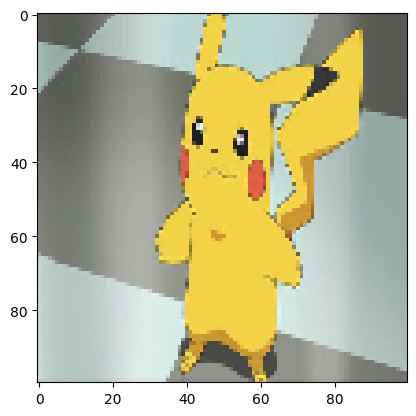

In [89]:
test_img = "/content/drive/MyDrive/Harsh/Machine Learning/Pokemon Classification/Test/Pikachu/2007.jpg"
img = image.load_img(test_img, target_size= (100,100))
img = image.img_to_array(img)
plt.imshow(img.astype('int'))

In [90]:
img = img.reshape(1,30000)
img.shape

(1, 30000)

In [91]:
pred = label2category[model.predict(img).argmax()]
pred

1/1 [==============================] - 0s 26ms/step


'Pikachu'